In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/445/new/CarsData.csv')
df.shape

(97712, 10)

In [3]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford

In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [5]:
df['car_age'] = 2024 - df['year']

In [6]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  car_age  
0         1.0       hyundi        7  
1         1.0   volkswagen        7  
2         2.0          BMW        5  
3         2.0        skoda        7  
4         1.2         ford        7

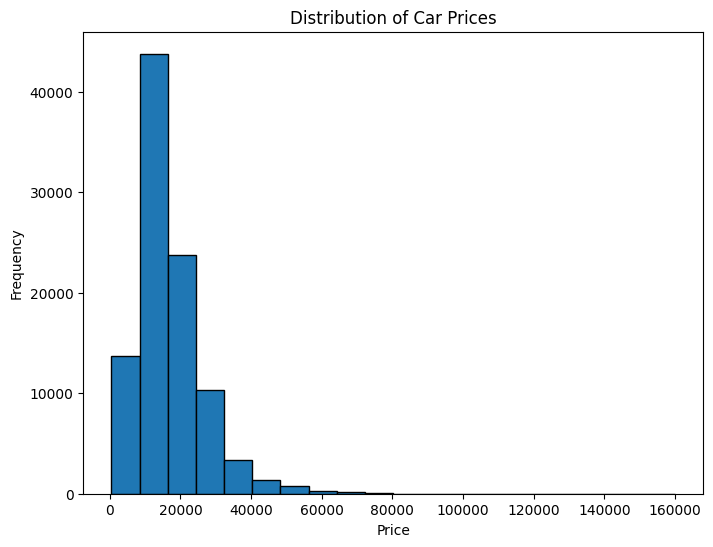

In [7]:
prices = df['price']
plt.figure(figsize=(8, 6))
plt.hist(prices, bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

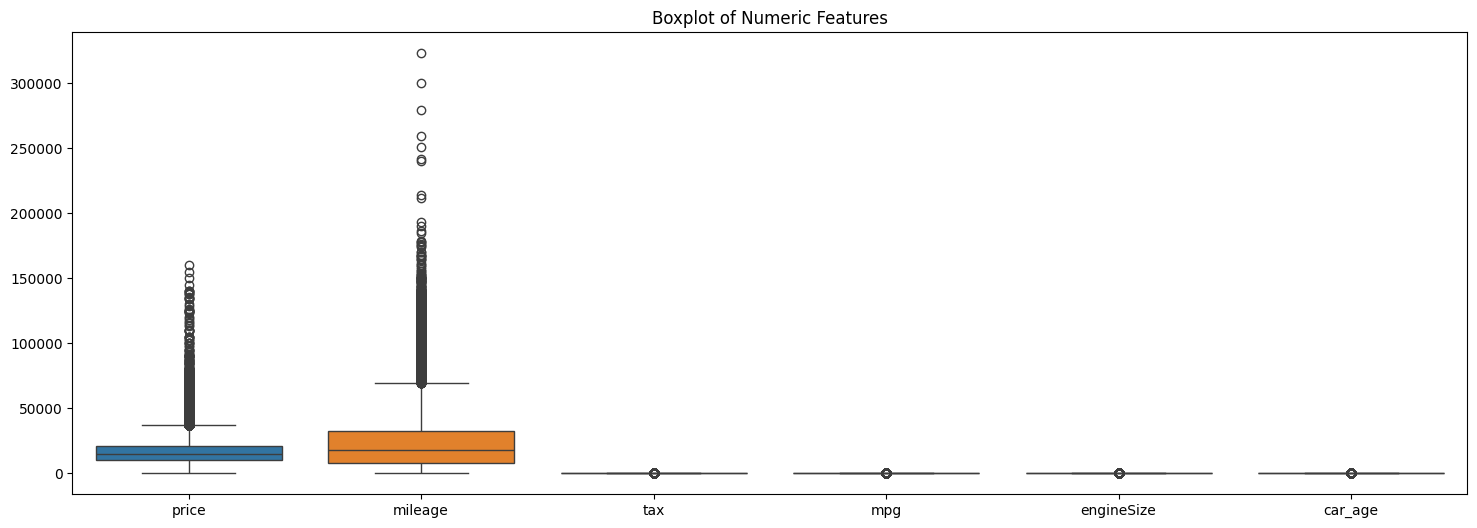

In [8]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[['price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']])
plt.title('Boxplot of Numeric Features')
plt.show()

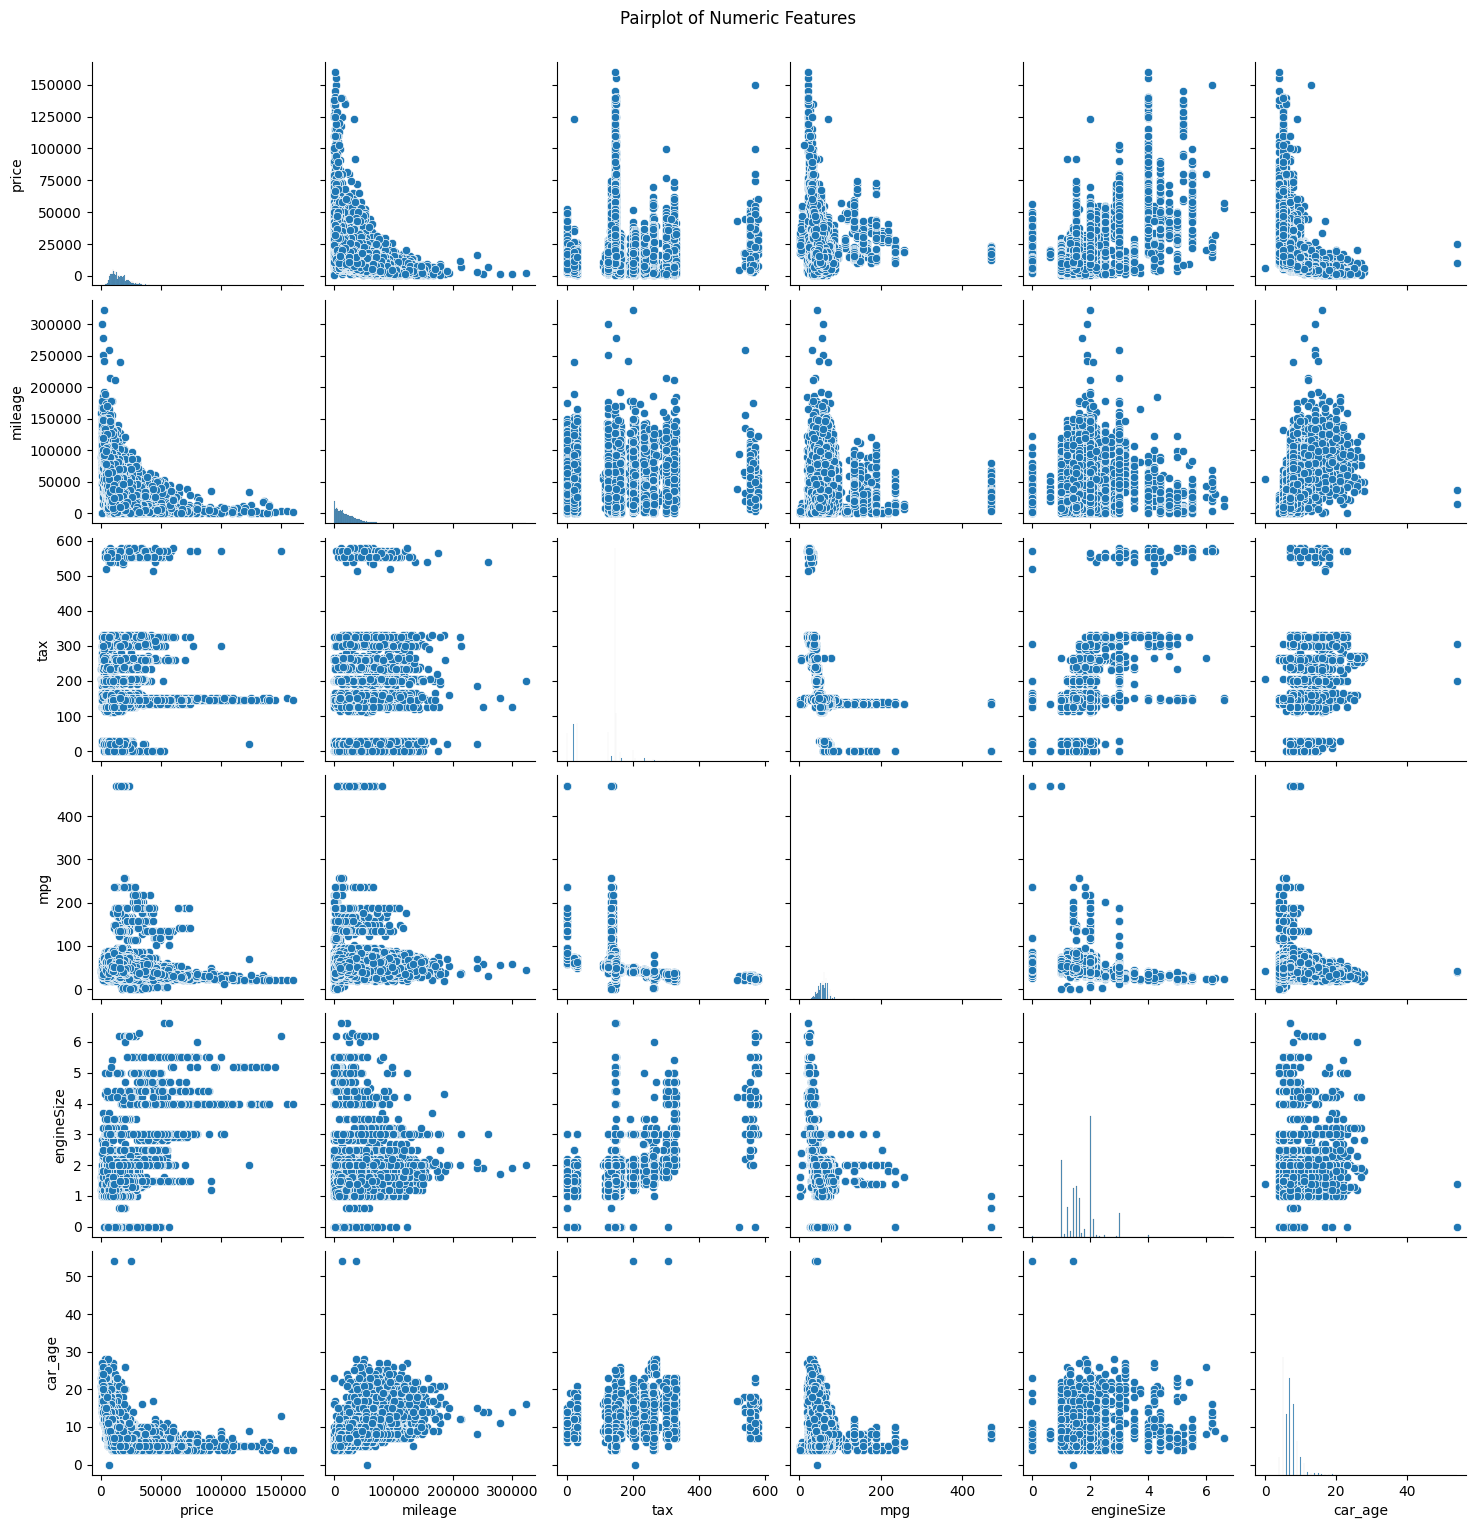

In [9]:
sns.pairplot(df[['price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [10]:
model_counts = df['model'].value_counts()
models_to_keep = model_counts[model_counts < 300].index
df_filtered_models = df[df['model'].isin(models_to_keep)]

df_filtered_models.reset_index(drop=True, inplace=True)

print(df_filtered_models.shape)

(10047, 11)


filtering

In [11]:
model_counts = df['model'].value_counts()
models_to_keep = model_counts[model_counts >= 300].index

conditions = (
    (df['car_age'] <= 10) & (df['car_age'] >= 4) &
    (df['mileage'] <= 40000) &
    (df['tax'] >= 125) & (df['tax'] <= 165) &
    (df['mpg'] <= 82) & (df['mpg'] >= 30) &
    (df['engineSize'] >= 1) & (df['engineSize'] <= 2.25) &
    (df['price'] >= 7000) & (df['price'] <= 25000) &
    (df['transmission'] != 'Other') &
    (df['fuelType'].isin(['Petrol', 'Diesel'])) &
    (df['model'].isin(models_to_keep))
)

df_filtered = df[conditions].reset_index(drop=True)
df_2 = df_filtered.copy()

In [12]:
df_2.shape

(42434, 11)

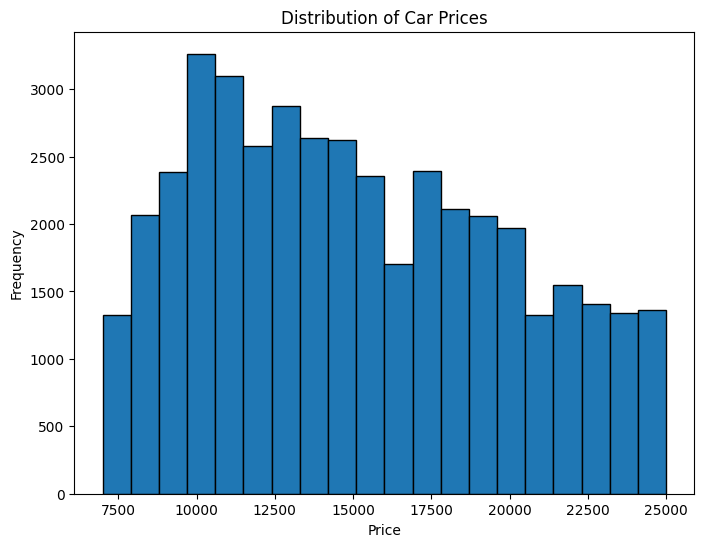

In [13]:
prices = df_2['price']

plt.figure(figsize=(8, 6))
plt.hist(prices, bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

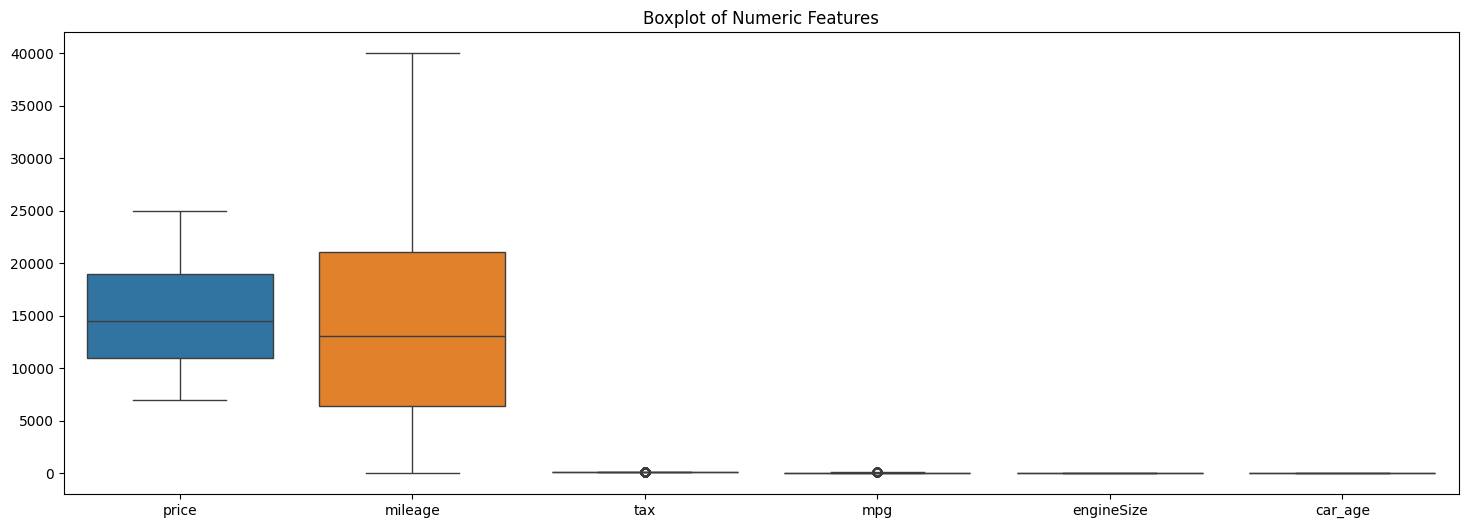

In [14]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df_2[['price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']])
plt.title('Boxplot of Numeric Features')
plt.show()

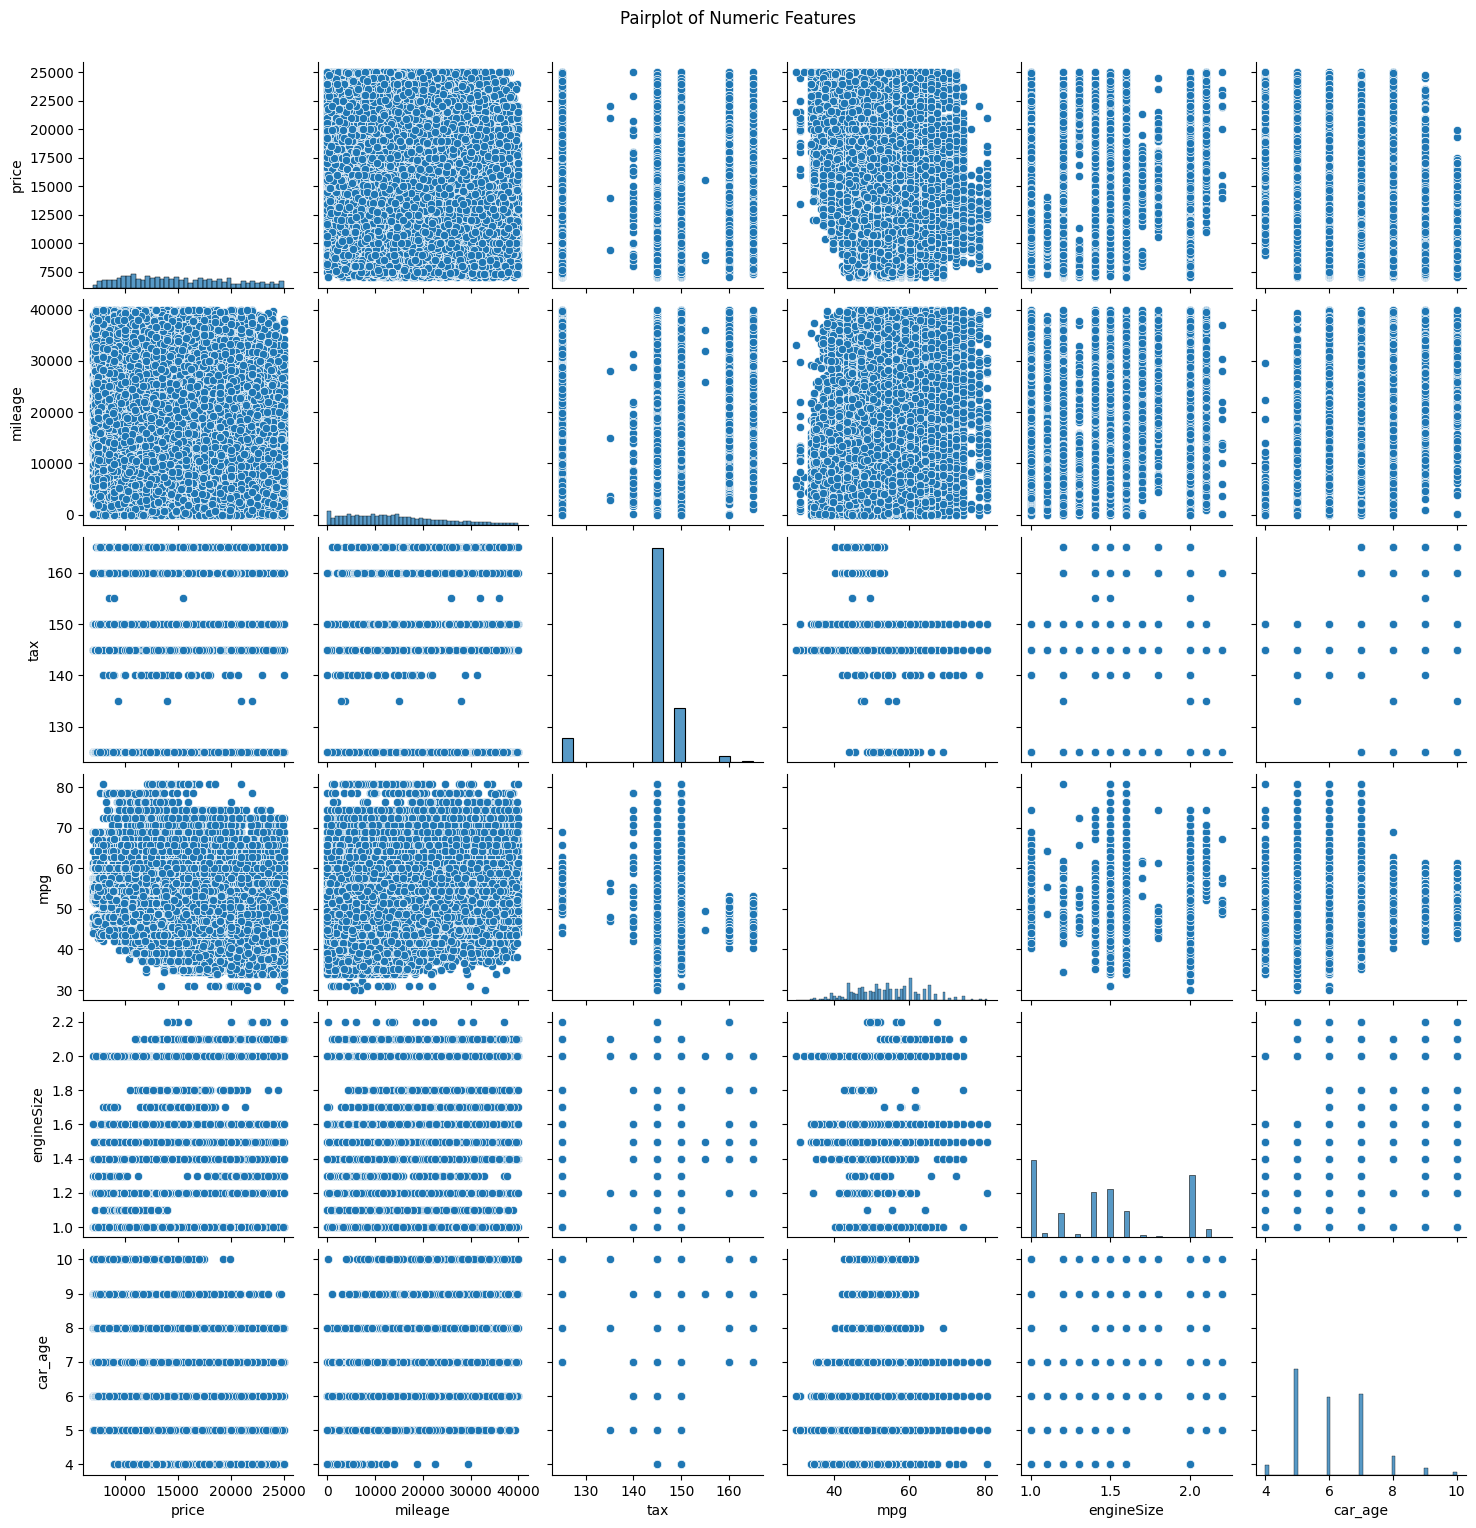

In [15]:
sns.pairplot(df_2[['price', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

In [16]:
cats = ["model", "transmission", "fuelType", "Manufacturer"]
nums = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']

label encoding for categorical data

In [17]:
le = LabelEncoder()
for cat in cats:
    df_2[cat] = le.fit_transform(df_filtered[cat])


df_2.head()

model  year  price  transmission  mileage  fuelType  tax   mpg  engineSize  \
0     33  2017   7495             1    11630         1  145  60.1         1.0   
1     47  2017  10989             1     9200         1  145  58.9         1.0   
2     64  2017  12495             1    30960         0  150  62.8         2.0   
3     27  2017   7999             1    19353         1  125  54.3         1.2   
4     41  2019  17990             1     7038         1  145  34.4         1.5   

   Manufacturer  car_age  
0             3        7  
1             8        7  
2             5        7  
3             2        7  
4             2        5

scaling numeric features

In [18]:
scaler = MinMaxScaler()
df_2[nums] = scaler.fit_transform(df_filtered[nums])

df_2.head()

model      year  price  transmission   mileage  fuelType    tax       mpg  \
0     33  0.500000   7495             1  0.290732         1  0.500  0.592885   
1     47  0.500000  10989             1  0.229981         1  0.500  0.569170   
2     64  0.500000  12495             1  0.773994         0  0.625  0.646245   
3     27  0.500000   7999             1  0.483812         1  0.000  0.478261   
4     41  0.833333  17990             1  0.175929         1  0.500  0.084980   

   engineSize  Manufacturer   car_age  
0    0.000000             3  0.500000  
1    0.000000             8  0.500000  
2    0.833333             5  0.500000  
3    0.166667             2  0.500000  
4    0.416667             2  0.166667

data augmentation

In [19]:
def add_gaussian_noise(data, mean=0, std=0.01):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise


df_augmented = df_2.copy()


numerical_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age']
for col in numerical_columns:
    df_augmented[col] = add_gaussian_noise(df_augmented[col])


df_combined = pd.concat([df_2, df_augmented], axis=0).reset_index(drop=True)

print("Original data shape:", df_2.shape)
print("Augmented data shape:", df_combined.shape)

Original data shape: (42434, 11)
Augmented data shape: (84868, 11)


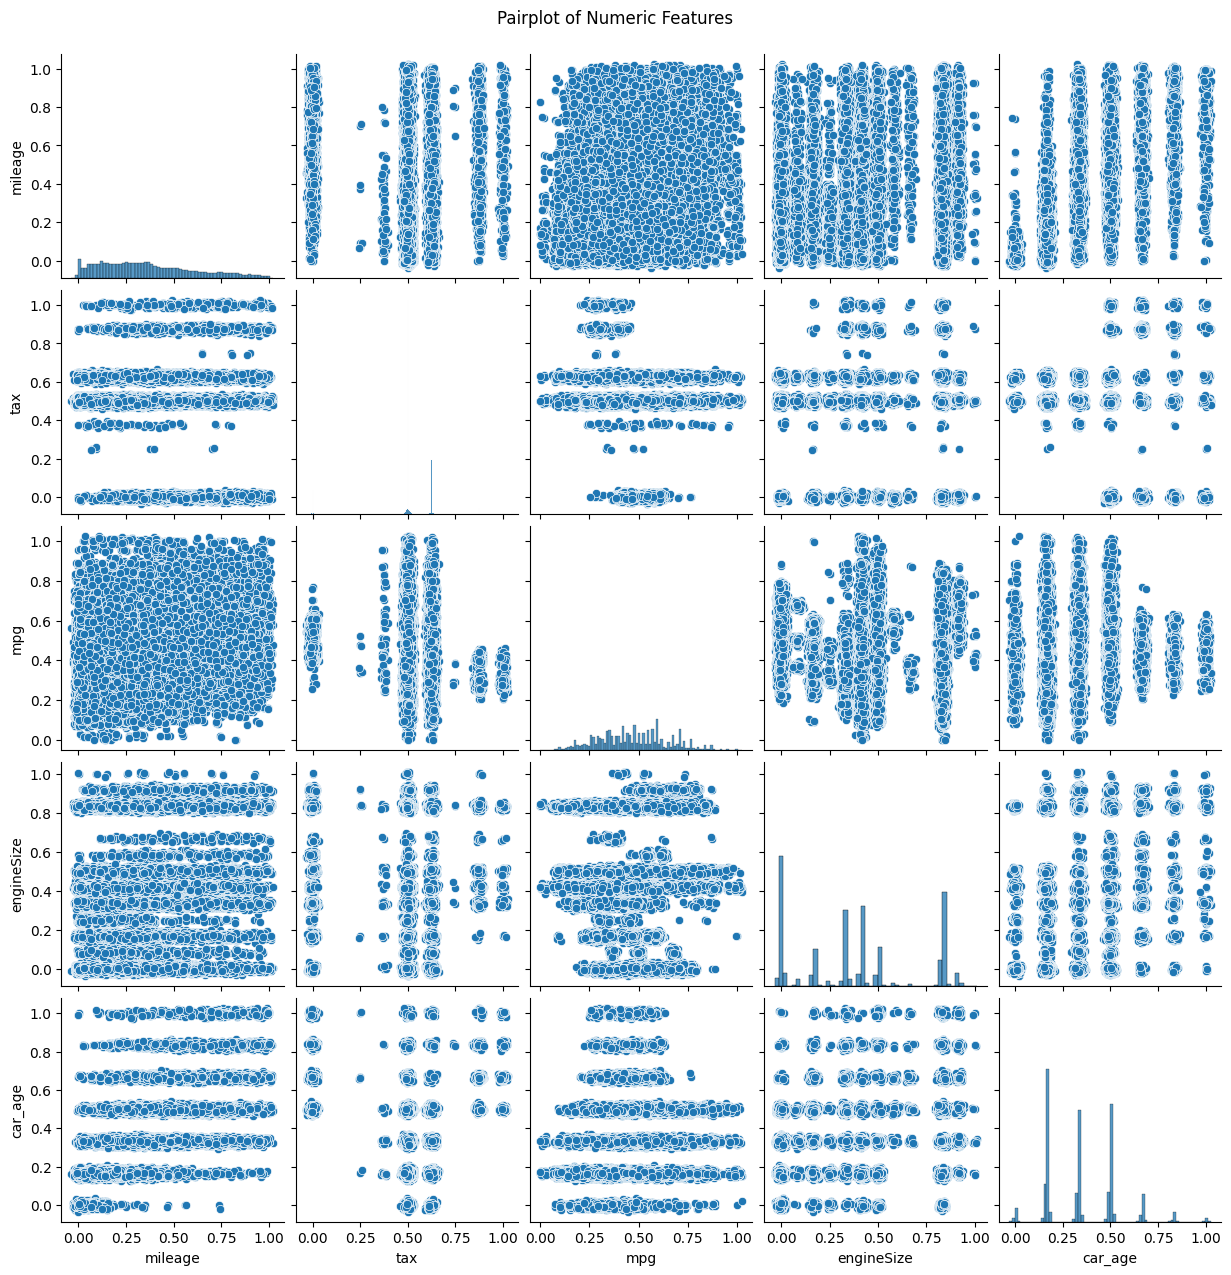

In [20]:
sns.pairplot(df_combined[['mileage', 'tax', 'mpg', 'engineSize', 'car_age']])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

dataset split

In [21]:
x = df_combined.drop('price', axis=1).values
y = df_combined['price'].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",y_val.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (50920, 10)
x test:  (16974, 10)
x val:  (16974,)
y train:  (50920,)
y test:  (16974,)
y val:  (16974,)


Linear regression

In [22]:
model = LinearRegression()

model.fit(x_train, y_train)
lr_y_pred = model.predict(x_test)

lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Test MAE: {lr_mae:.2f}")
print(f"Test MSE: {lr_mse:.2f}")
print(f"Test RMSE: {lr_rmse:.2f}")
print(f"Test R^2: {lr_r2:.2f}")

Test MAE: 2429.63
Test MSE: 9238623.52
Test RMSE: 3039.51
Test R^2: 0.60


In [23]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = lr_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

model  transmission  fuelType  Manufacturer  year   mileage       tax  \
0  0.446154      0.647965       1.0      0.386261   1.0  0.498285  0.367707   
1  0.661538      0.496913       1.0      0.774825   1.0  0.504362  0.258088   
2  0.415385      0.647139       0.5      0.755314   1.0  0.490782  0.684040   

        mpg  engineSize   car_age  Actual Price  Predicted Price  
0  0.510600       0.500  0.336424         21795     17089.818505  
1  0.352353       0.875  0.502098         12221     12464.225083  
2  0.028133       0.250  0.345726          9498     10411.370661

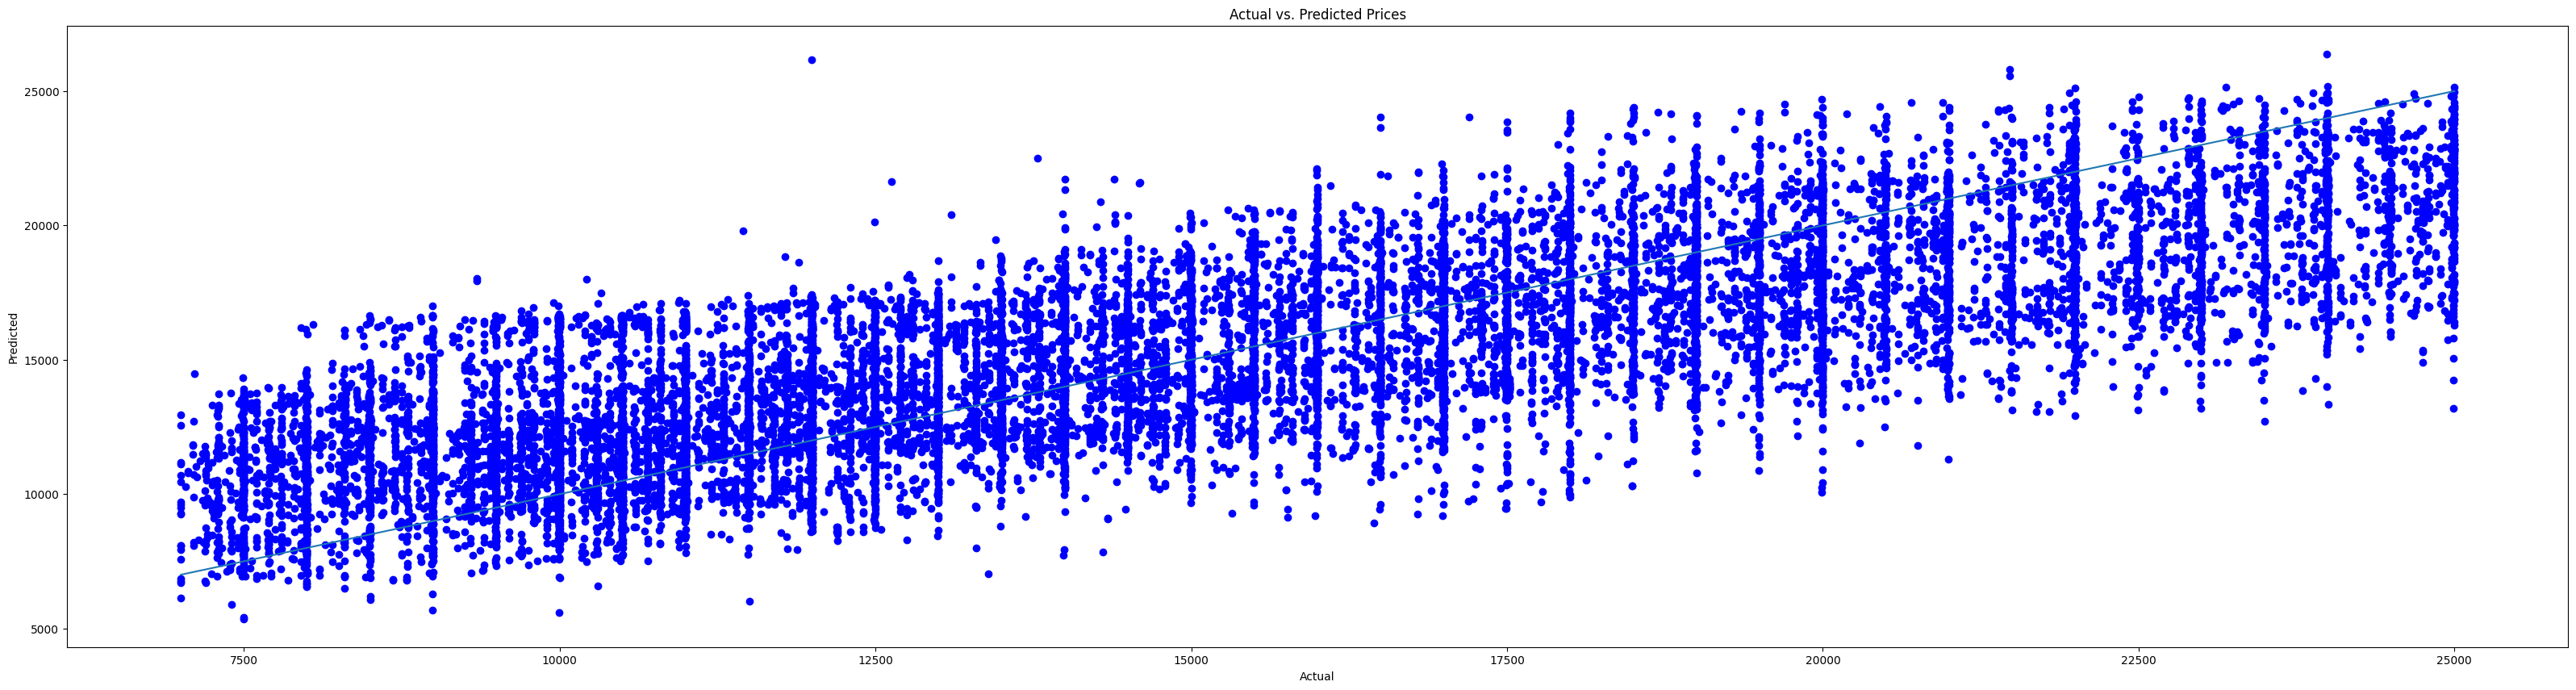

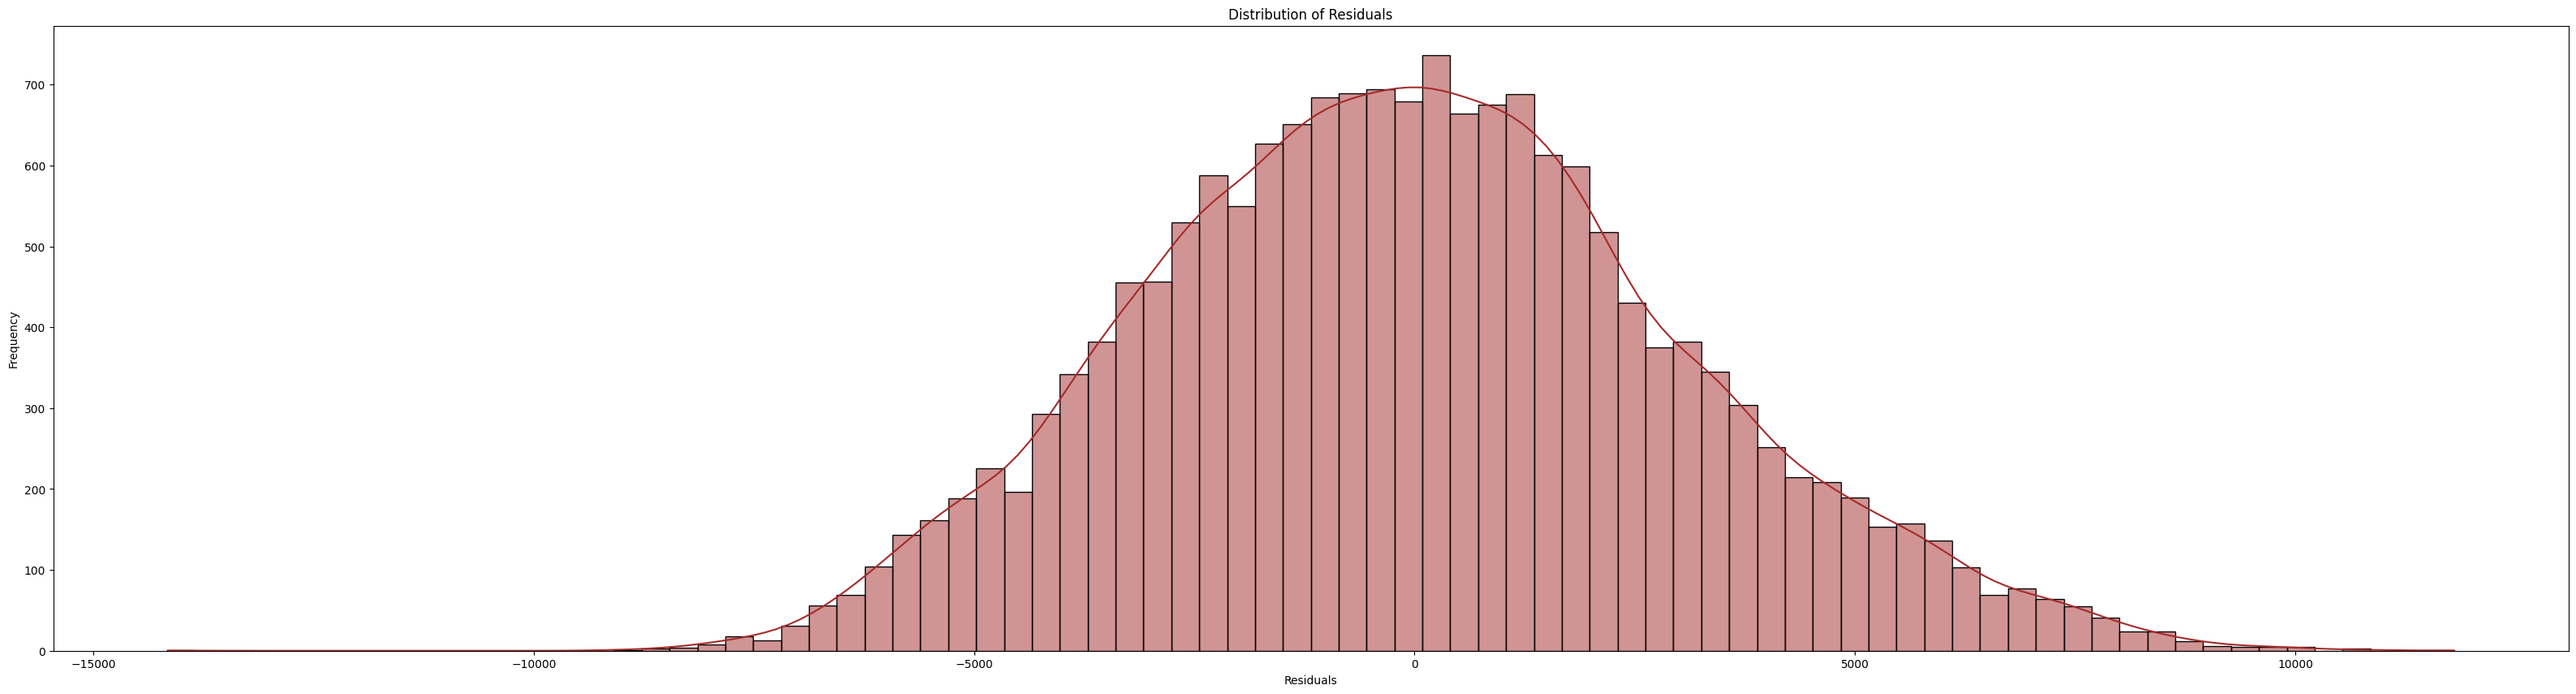

In [24]:
plt.figure(figsize=(40, 10))
plt.scatter(y_test, lr_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - lr_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='brown')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

KNN

In [25]:
knn_model = KNeighborsRegressor(n_neighbors=9, algorithm='brute', weights='distance')

knn_model.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)


knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)


print(f"Test MAE: {knn_mae:.2f}")
print(f"Test MSE: {knn_mse:.2f}")
print(f"Test RMSE: {knn_rmse:.2f}")
print(f"Test R^2: {knn_r2:.2f}")

Test MAE: 875.71
Test MSE: 1515194.52
Test RMSE: 1230.93
Test R^2: 0.93


In [26]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = knn_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

model  transmission  fuelType  Manufacturer  year   mileage       tax  \
0  0.446154      0.647965       1.0      0.386261   1.0  0.498285  0.367707   
1  0.661538      0.496913       1.0      0.774825   1.0  0.504362  0.258088   
2  0.415385      0.647139       0.5      0.755314   1.0  0.490782  0.684040   

        mpg  engineSize   car_age  Actual Price  Predicted Price  
0  0.510600       0.500  0.336424         21795     21011.880675  
1  0.352353       0.875  0.502098         12221     12317.657867  
2  0.028133       0.250  0.345726          9498     10727.519492

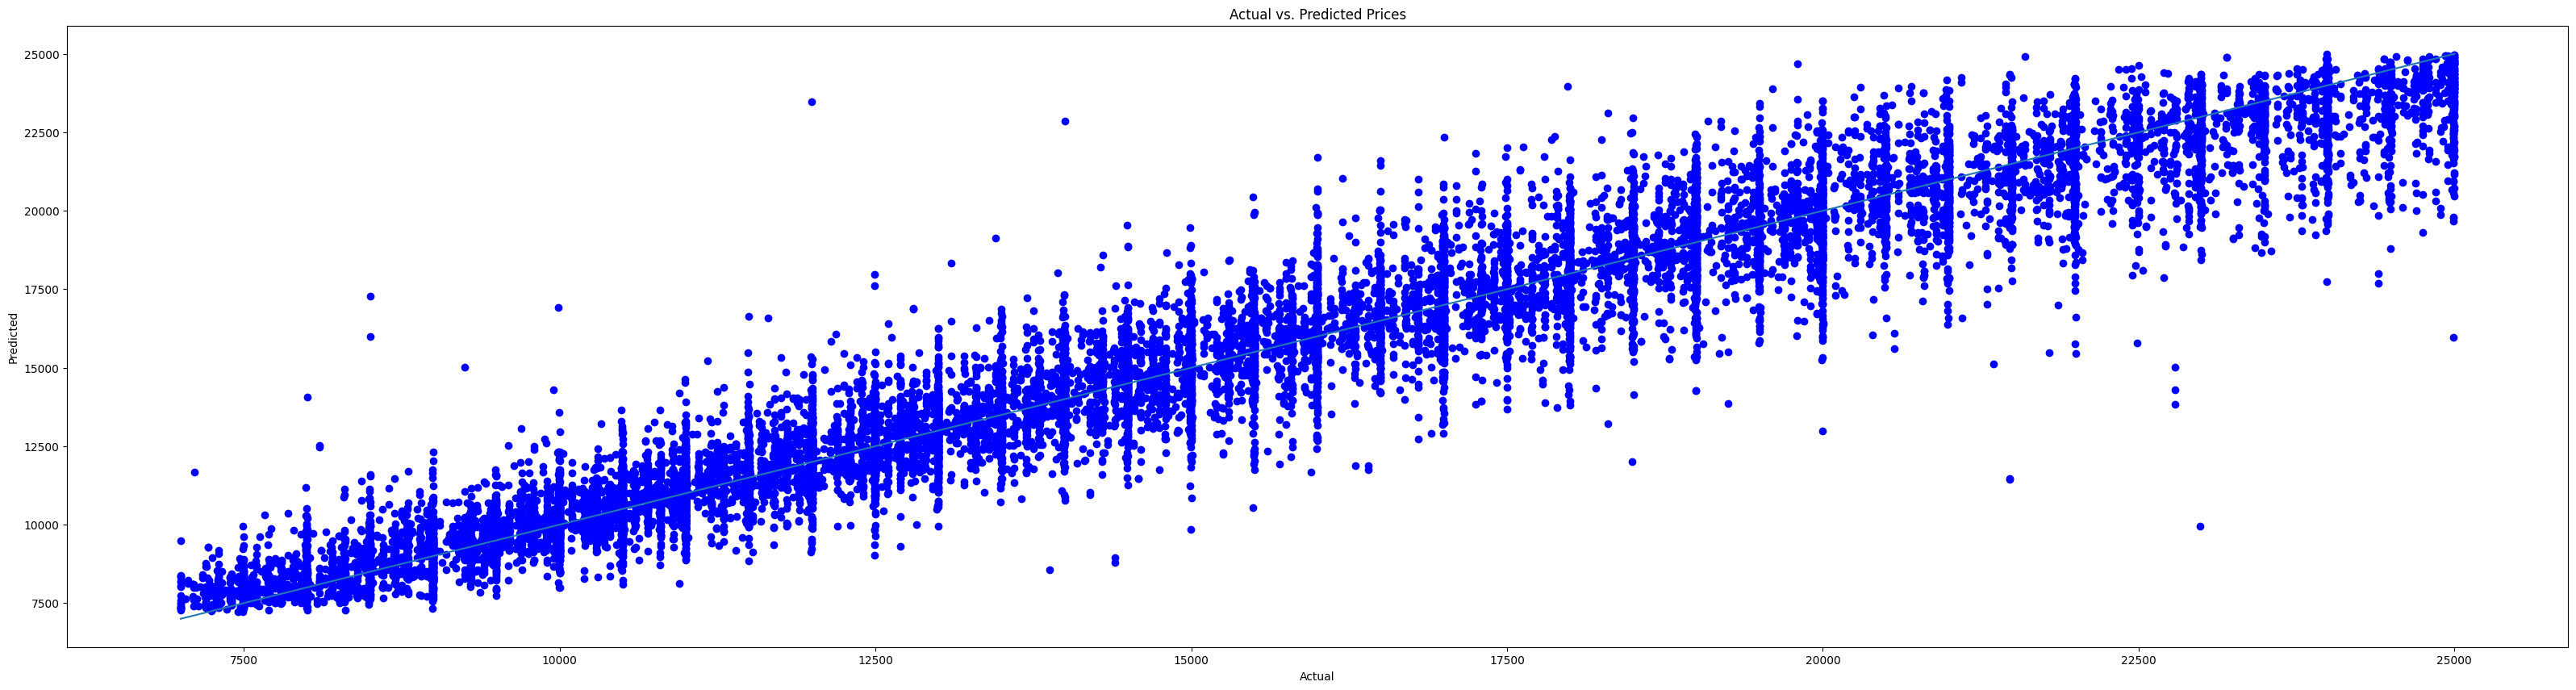

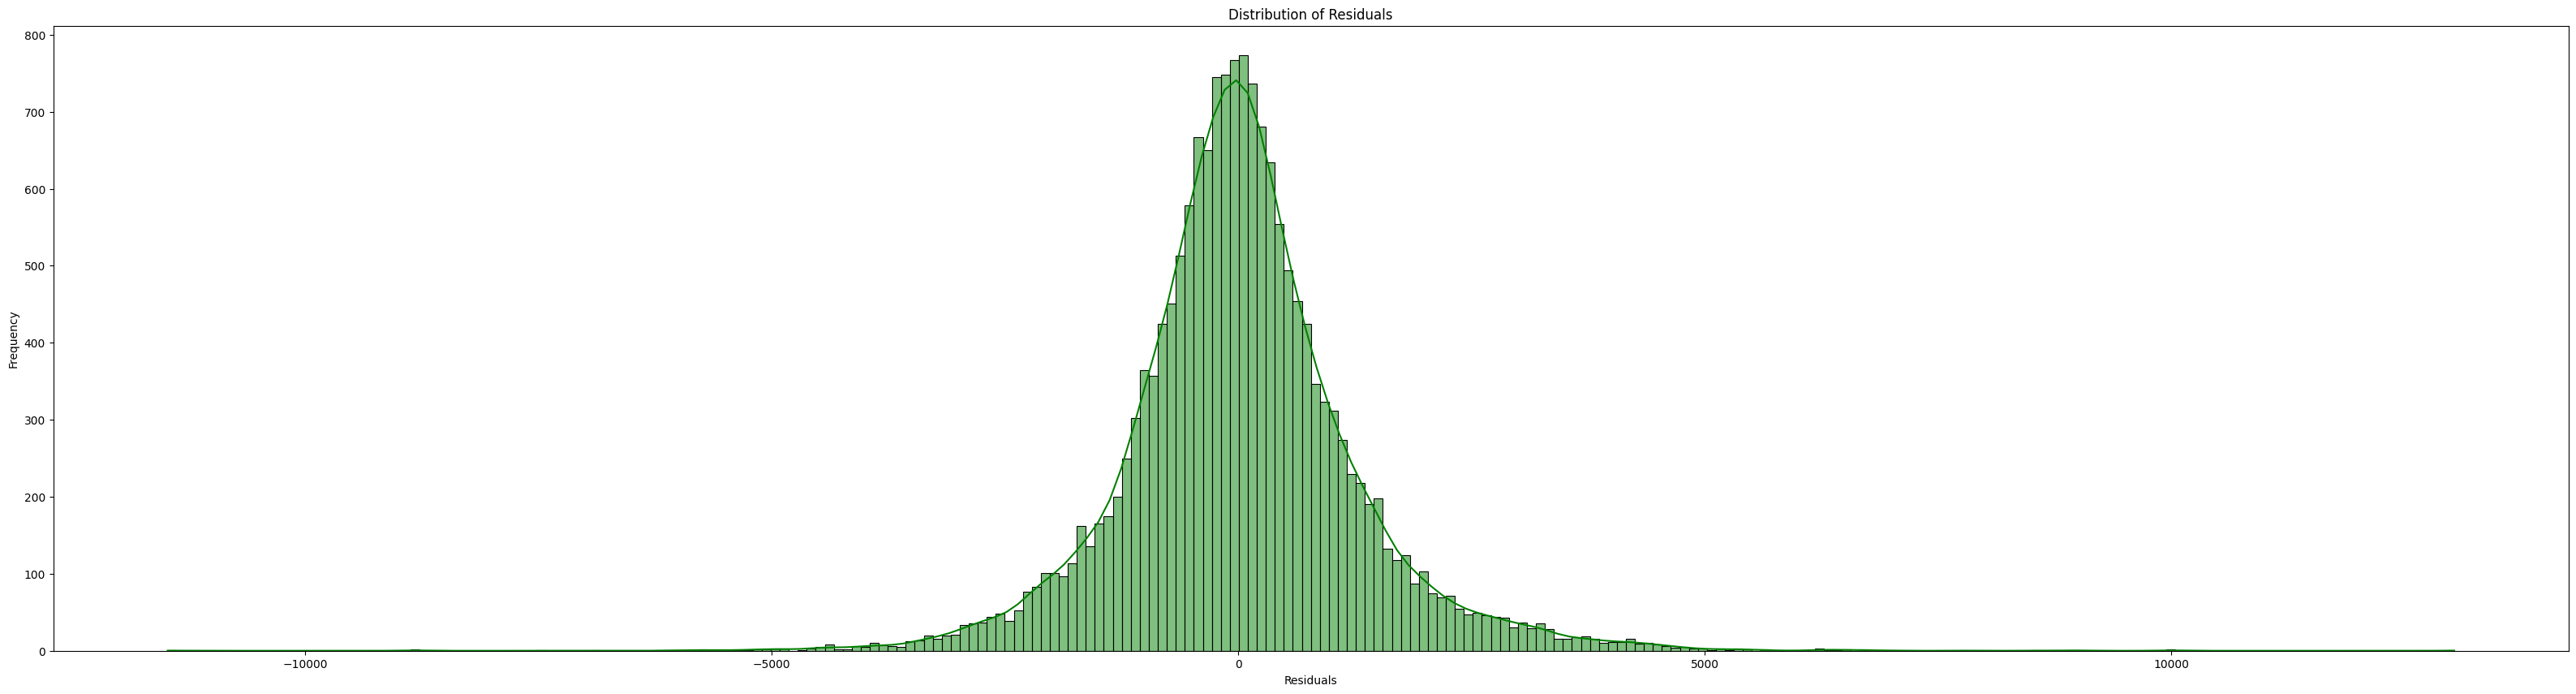

In [27]:
plt.figure(figsize=(40, 10))
plt.scatter(y_test, knn_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - knn_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

random forest

In [28]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)


rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)


print(f"Test MAE: {rf_mae:.2f}")
print(f"Test MSE: {rf_mse:.2f}")
print(f"Test RMSE: {rf_rmse:.2f}")
print(f"Test R^2: {rf_r2:.2f}")

Test MAE: 862.79
Test MSE: 1458848.69
Test RMSE: 1207.83
Test R^2: 0.94


In [29]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = rf_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

model  transmission  fuelType  Manufacturer  year   mileage       tax  \
0  0.446154      0.647965       1.0      0.386261   1.0  0.498285  0.367707   
1  0.661538      0.496913       1.0      0.774825   1.0  0.504362  0.258088   
2  0.415385      0.647139       0.5      0.755314   1.0  0.490782  0.684040   

        mpg  engineSize   car_age  Actual Price  Predicted Price  
0  0.510600       0.500  0.336424         21795         21013.11  
1  0.352353       0.875  0.502098         12221         11957.18  
2  0.028133       0.250  0.345726          9498         10765.20

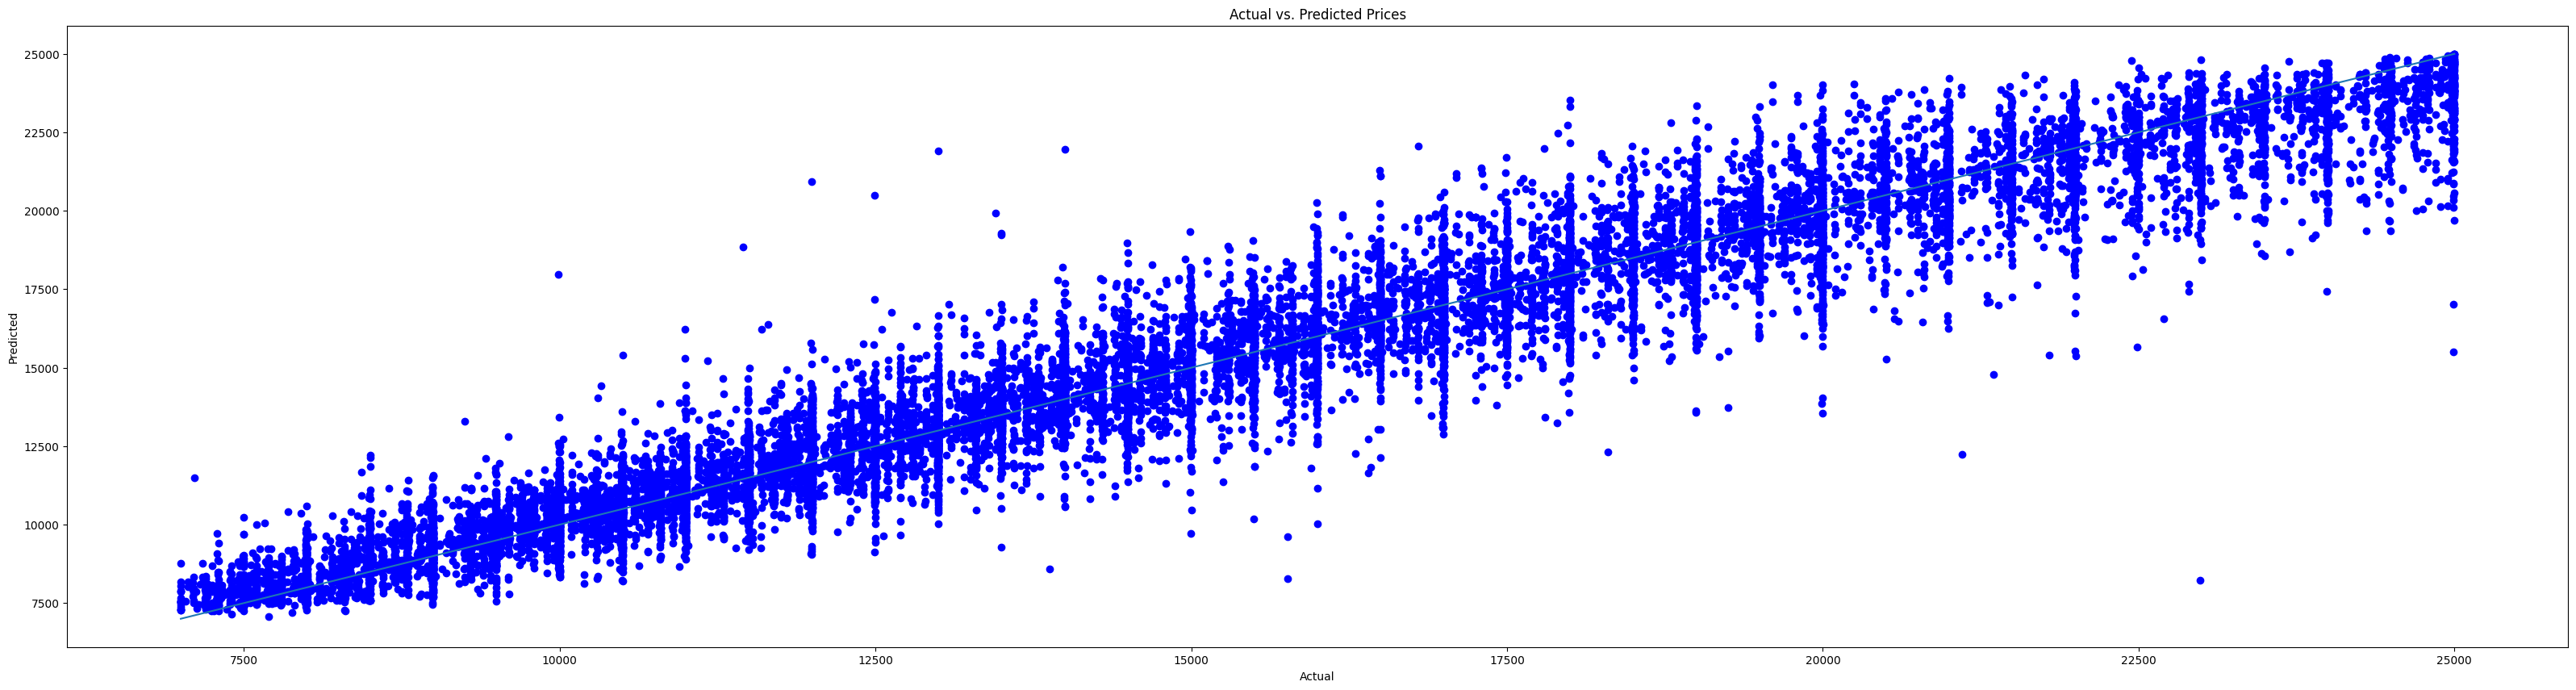

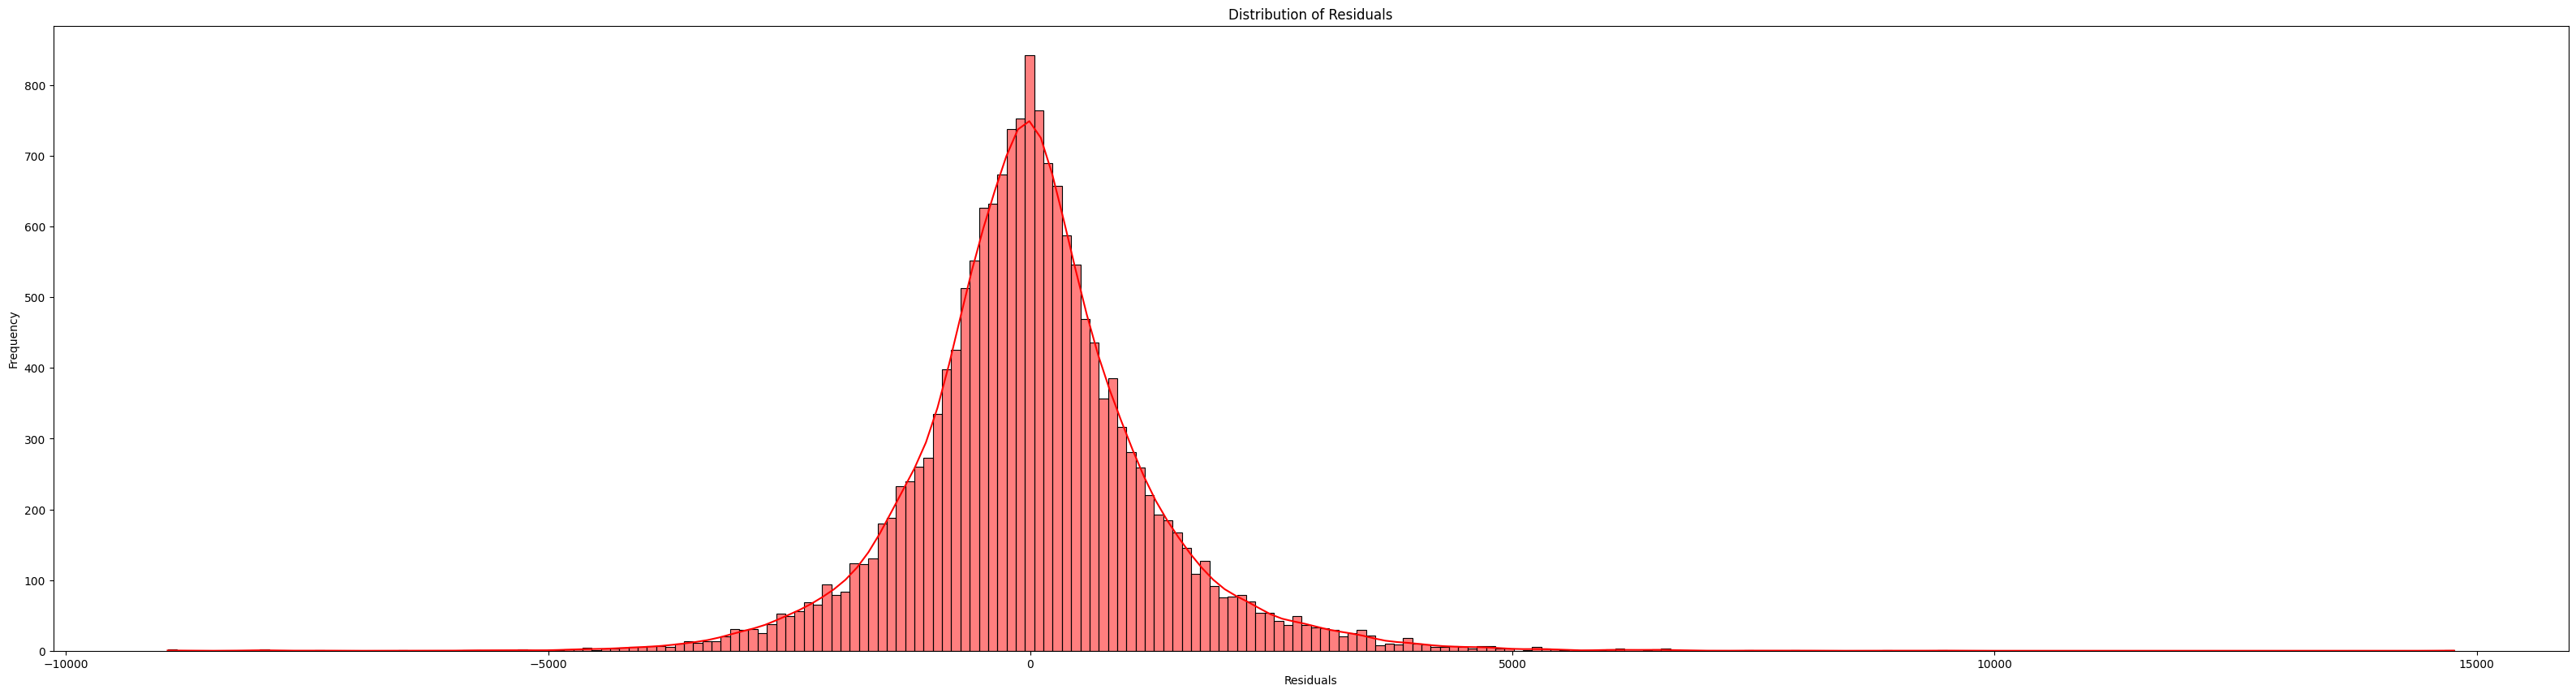

In [30]:
plt.figure(figsize=(40, 10))
plt.scatter(y_test, rf_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - rf_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

svm

In [ ]:
svm_model = SVR(kernel='poly')

svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)


svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)


print(f"Test MAE: {svm_mae:.2f}")
print(f"Test MSE: {svm_mse:.2f}")
print(f"Test RMSE: {svm_rmse:.2f}")
print(f"Test R^2: {svm_r2:.2f}")

In [ ]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = svm_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

In [ ]:
plt.figure(figsize=(40, 10))
plt.scatter(y_test, svm_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - svm_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

adaBoost

In [ ]:
adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42, base_estimator=DecisionTreeRegressor(max_depth=7))

adaboost_model.fit(x_train, y_train)
ada_y_pred = adaboost_model.predict(x_test)


ada_mse = mean_squared_error(y_test, ada_y_pred)
ada_rmse = np.sqrt(ada_mse)
ada_mae = mean_absolute_error(y_test, ada_y_pred)
ada_r2 = r2_score(y_test, ada_y_pred)


print(f"Test MAE: {ada_mae:.2f}")
print(f"Test MSE: {ada_mse:.2f}")
print(f"Test RMSE: {ada_rmse:.2f}")
print(f"Test R^2: {ada_r2:.2f}")

In [ ]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = ada_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

In [ ]:

plt.figure(figsize=(40, 10))
plt.scatter(y_test, ada_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - ada_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


gradient boosting

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=2, random_state=42)

gb_model.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)


gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)


print(f"Test MAE: {gb_mae:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test RMSE: {gb_rmse:.2f}")
print(f"Test R^2: {gb_r2:.2f}")

In [ ]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Predicted Price'] = gb_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

In [ ]:

plt.figure(figsize=(40, 10))
plt.scatter(y_test, gb_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Prices')
plt.show()


residuals = y_test - gb_y_pred
plt.figure(figsize=(40, 10))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
samples = pd.DataFrame(x_test, columns=["model", "transmission", "fuelType", "Manufacturer",'year', 'mileage', 'tax', 'mpg', 'engineSize', 'car_age'])
samples['Actual Price'] = y_test
samples['Linear Regression'] = lr_y_pred
samples['KNN'] = knn_y_pred
samples['Random Forest'] = rf_y_pred
samples['SVM'] = svm_y_pred
samples['AdaBoost'] = ada_y_pred
samples['Gradient Boost'] = gb_y_pred
samples.reset_index(drop=True, inplace=True)
samples.head(3)

In [ ]:

print("----------------------------------------")
print("Linear Regression")
print(f"Test MAE: {lr_mae:.2f}")
print(f"Test MSE: {lr_mse:.2f}")
print(f"Test RMSE: {lr_rmse:.2f}")
print(f"Test R^2: {lr_r2:.2f}")
print("----------------------------------------")
print("KNN")
print(f"Test MAE: {knn_mae:.2f}")
print(f"Test MSE: {knn_mse:.2f}")
print(f"Test RMSE: {knn_rmse:.2f}")
print(f"Test R^2: {knn_r2:.2f}")
print("----------------------------------------")
print("Random Forest")
print(f"Test MAE: {rf_mae:.2f}")
print(f"Test MSE: {rf_mse:.2f}")
print(f"Test RMSE: {rf_rmse:.2f}")
print(f"Test R^2: {rf_r2:.2f}")
print("----------------------------------------")
print("SVM")
print(f"Test MAE: {svm_mae:.2f}")
print(f"Test MSE: {svm_mse:.2f}")
print(f"Test RMSE: {svm_rmse:.2f}")
print(f"Test R^2: {svm_r2:.2f}")
print("----------------------------------------")
print("AdaBoost")
print(f"Test MAE: {ada_mae:.2f}")
print(f"Test MSE: {ada_mse:.2f}")
print(f"Test RMSE: {ada_rmse:.2f}")
print(f"Test R^2: {ada_r2:.2f}")
print("----------------------------------------")
print("Gradient Boost")
print(f"Test MAE: {gb_mae:.2f}")
print(f"Test MSE: {gb_mse:.2f}")
print(f"Test RMSE: {gb_rmse:.2f}")
print(f"Test R^2: {gb_r2:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the results dictionary is already defined
results = {
    "Linear Regression": [lr_mae, lr_mse, lr_rmse, lr_r2],
    "KNN": [knn_mae, knn_mse, knn_rmse, knn_r2],
    "Random Forest": [rf_mae, rf_mse, rf_rmse, rf_r2],
    "SVR": [svm_mae, svm_mse, svm_rmse, svm_r2],
    "AdaBoost": [ada_mae, ada_mse, ada_rmse, ada_r2],
    "Gradient Boost": [gb_mae, gb_mse, gb_rmse, gb_r2]
}

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, index=['MAE', 'MSE', 'RMSE', 'R^2'])

# Define the number of subplots
num_metrics = results_df.shape[0]

# Create subplots
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 4 * num_metrics))

# Plot each metric separately
for i, metric in enumerate(results_df.index):
    results_df.loc[metric].plot(kind='bar', ax=axes[i], color='blue')
    axes[i].set_title(f'Model Performance Comparison - {metric}')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(results_df.columns, rotation=45)

plt.tight_layout()
plt.show()
